## Data Preparation

At this point we have a directory with images and contours and associated CSV files.

This notebook builds functions which are run every time we do a new experiement.

These functions are as follows.

1. Alter the contours DataFrame for the type of problem we are doing (2-class, 3-class, 4-class).
2. Create Train / Test / Validation Split and save these dataframes.
3. Generate the Patches for our new Train / Test / Validation Split. (train_patches.csv, test_patches.csv, val_patches.csv and directories)
4. Log very verbose debugging information so we can see exactly how our data has been reorganized.
5. Filter the patches based on various criteria and show all the patches we eliminate from the dataset for debugging purposes.

In [1]:
# import required libraries
import sys
sys.path.append('../')
from importlib import reload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
import random
import libs.utils as utils
import libs.bounding_box as bounding_box
import libs.patch_tools as patch_tools
import libs.data_prep as data_prep
import libs.train_test_split as tts
import libs.render as render
reload(patch_tools)
reload(tts)
reload(utils)

# set the random seed for we always get the same results (for now)
random.seed(42)


In [2]:
# generate an ID and setup our experiment
exp_id = utils.short_id()
exp_id = '760b8d98'
print('ID: {}'.format(exp_id))


ID: 760b8d98


In [4]:
# Step #1 : Create a copy of the data for this experiment
reload(utils)
reload(data_prep)

# source of data
base_dir = './2c193b4a/good_v1'

# create our log dir
data_prep.setup_experiment(base_dir, exp_id)

# import the new data
images_csv_path = os.path.join(exp_id, 'images.csv')
contours_csv_path = os.path.join(exp_id, 'contours.csv')
img_df = pd.read_csv(images_csv_path)
roi_df = pd.read_csv(contours_csv_path)

dest_dir = os.path.join(exp_id)

In [5]:
# 3-Class Problem Test : Benign v. Papilloma

roi_2class = roi_df.copy()

# convert our classes
roi_2class = roi_2class[roi_2class.label.isin([1,2])].reset_index(drop=True)
train2bp_df, test2bp_df, val2bp_df = tts.train_test_validation_split(roi_2class, classes=[1,2], samples=3)

# save our results
train2bp_df.to_csv(os.path.join(dest_dir, 'contours_train.csv'), index=False)
test2bp_df.to_csv(os.path.join(dest_dir, 'contours_test.csv'), index=False)
val2bp_df.to_csv(os.path.join(dest_dir, 'contours_val.csv'), index=False)

n: 32
distribution: [1 2] [21 11]
classes: [1 2], samples_per_class: 3
train-n: 20
test-n: 6
val-n: 6


In [6]:
reload(data_prep)
reload(utils)
reload(render)

# show what we eliminated
data_prep.show_contours_for_experiment(exp_id, roi_df, roi_2class)

total contours: 65
eliminated contours: 33
kept contours: 32


image_id        id          name  label
0   hgv-44a1f2e3  2dd43905  2dd43905.csv      4
1   hgv-453fea32  d50cc4f8  d50cc4f8.csv      4
2   hgv-2cdb69f6  8206157b  8206157b.csv      3
3   hgv-2cdb69f6  1c013836  1c013836.csv      3
4   hgv-6d2317b0  ed68be3f  ed68be3f.csv      4
5   mdi-9abd4637  ad1b57ba  ad1b57ba.csv      4
6   mdi-9abd4637  a587fb0a  a587fb0a.csv      4
7   mdi-9abd4637  3461fc88  3461fc88.csv      4
8   mdi-e3b0c312  86a09485  86a09485.csv      4
9   mdi-e3b0c312  319a6d2d  319a6d2d.csv      4
10  mdi-1061cc91  fc982917  fc982917.csv      3
11  mdi-1061cc91  56ad66ea  56ad66ea.csv      3
12  mdi-461bdebc  7a876ffc  7a876ffc.csv      4
13  mdi-461bdebc  c9454f57  c9454f57.csv      4
14  mdi-945f5ac6  c344443d  c344443d.csv      4
15  mdi-f5cb6906  f521a3e0  f521a3e0.csv      4
16  mdi-f5cb6906  84751607  84751607.csv      4
17  mdi-df9a656f  40b3ce8d  40b3ce8d.csv      4
18  mdi-df9a656f  f492e96f  f492e96f.csv      4
19  mdi-df9a656f  d6675d6a  d6675d6a.csv      4
20  mdi-b731a91f  45b886e2  45b886e2.csv      4
21  mdi-b731a91f  93cdba18  93cdba18.csv      4
22  mdi-b731a91f  c32037c6  c32037c6.csv      4
23  mdi-9ce9698b  e3385444  e3385444.csv      4
24  mdi-9ce9698b  b4529522  b4529522.csv      4
25  mdi-9ce9698b  2bac5541  2bac5541.csv      4
26  mdi-5e3d3832  9bb4c49e  9bb4c49e.csv      4
27  mdi-5e3d3832  83fc7472  83fc7472.csv      4
28  mdi-f3f9ede5  7ce56377  7ce56377.csv      4
29  mdi-f3f9ede5  8bfb34ca  8bfb34ca.csv      4
30  odi-1767f1a2  efe502d8  efe502d8.csv      4
31  odi-8ad90fea  85063d46  85063d46.csv      3
32  odi-2511b830  5d2996e2  5d2996e2.csv      3

In [69]:
# Now We generate Directories for each component : Train, Test, Validation
reload(data_prep)

# Refs to our Data
#images_df = pd.read_csv(os.path.join(exp_id, 'images.csv'))
#images_dir = os.path.join(exp_id, 'images')
#contours_dir = os.path.join(exp_id, 'contours')
#log_dir = os.path.join(exp_id, 'log')


In [7]:
# Training Data : Setup
train_df  = pd.read_csv(os.path.join(exp_id, 'contours_train.csv'))
data_prep.setup_component(exp_id, train_df, 'train')
data_prep.log_component_info(os.path.join(exp_id, 'train'))

In [8]:
# Test Data : Setup
test_df = pd.read_csv(os.path.join(exp_id, 'contours_test.csv'))
data_prep.setup_component(exp_id, test_df, 'test')
data_prep.log_component_info(os.path.join(exp_id, 'test'))

In [9]:
# Validation Data : Setup
val_df = pd.read_csv(os.path.join(exp_id, 'contours_val.csv'))
data_prep.setup_component(exp_id, val_df, 'val')
data_prep.log_component_info(os.path.join(exp_id, 'val'))

In [10]:
# Now we generate Patches for each of datasets
import libs.patch_tools as patch_tools
reload(patch_tools)
reload(data_prep)

train_patches_df = data_prep.setup_patches_for(os.path.join(exp_id, 'train'), patch_size = 64, patch_overlap = 0.5, threshold = 0.5)

display(train_patches_df.head())
print('count: {}'.format(len(train_patches_df)))

image_id contour_id  patch_id    patch_name    x    y label_id
0  hgv-2d4a6a46   76f536d8  576f95f5  576f95f5.jpg  910  712        1
1  hgv-2d4a6a46   76f536d8  7ede25f5  7ede25f5.jpg  942  712        1
2  hgv-2d4a6a46   76f536d8  2f28efe7  2f28efe7.jpg  814  744        1
3  hgv-2d4a6a46   76f536d8  817b78d6  817b78d6.jpg  846  744        1
4  hgv-2d4a6a46   76f536d8  6d0ce110  6d0ce110.jpg  878  744        1

count: 923


In [12]:
reload(data_prep)
# Generate Patches for Testing:
test_patches_df = data_prep.setup_patches_for(os.path.join(exp_id, 'test'), patch_size = 64, patch_overlap = 0.5, threshold = 0.5)

display(test_patches_df.head())
print('count: {}'.format(len(test_patches_df)))

image_id contour_id  patch_id    patch_name     x    y label_id
0  hgv-2d4a6a46   2a8db1fa  bc7043e8  bc7043e8.jpg  1464  536        2
1  hgv-2d4a6a46   2a8db1fa  7647e9de  7647e9de.jpg  1432  568        2
2  hgv-2d4a6a46   2a8db1fa  59bc96a1  59bc96a1.jpg  1464  568        2
3  hgv-2d4a6a46   2a8db1fa  5b8a0b17  5b8a0b17.jpg  1496  568        2
4  hgv-2d4a6a46   2a8db1fa  f07fdd21  f07fdd21.jpg  1400  600        2

count: 341


In [13]:
# Generate Patches for : Validation
val_patches_df = data_prep.setup_patches_for(os.path.join(exp_id, 'val'), patch_size = 64, patch_overlap = 0.5, threshold = 0.5)

display(val_patches_df.head())
print('count: {}'.format(len(val_patches_df)))

image_id contour_id  patch_id    patch_name     x    y label_id
0  hgv-44a1f2e3   3cde1351  f6b434e2  f6b434e2.jpg  1279  168        1
1  hgv-44a1f2e3   3cde1351  871ef1ab  871ef1ab.jpg  1311  168        1
2  hgv-44a1f2e3   3cde1351  3d5a6bbc  3d5a6bbc.jpg  1279  200        1
3  hgv-44a1f2e3   3cde1351  f05020d6  f05020d6.jpg  1311  200        1
4  hgv-44a1f2e3   3cde1351  af91432c  af91432c.jpg  1343  200        1

count: 248


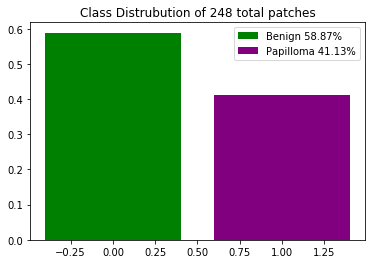

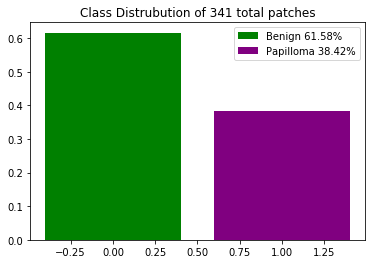

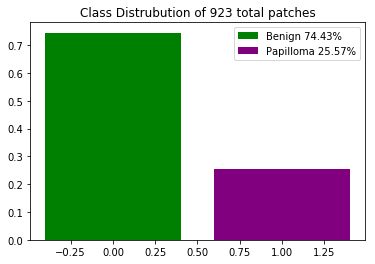

In [14]:
import libs.stats as stats
reload(stats)

# BEFORE FILTERING PATCHES LOOK AT PATCH DISTRIBUTION

stats.plot_label_distribution(val_patches_df, labels=[1,2], label_key='label_id')
stats.plot_label_distribution(test_patches_df, labels=[1,2], label_key='label_id')
stats.plot_label_distribution(train_patches_df, labels=[1,2], label_key='label_id')

In [15]:
## Now we can begin actually filtering the patches to determine which are too bad quality to train our algorithm with
reload(data_prep)

train_dir = os.path.join(exp_id, 'train')
test_dir = os.path.join(exp_id, 'test')
val_dir = os.path.join(exp_id, 'val')

data_prep.filter_highlight_patches_for(train_dir, patch_size = 64, threshold=0.6)
data_prep.filter_highlight_patches_for(test_dir, patch_size = 64, threshold=0.6)
data_prep.filter_highlight_patches_for(val_dir, patch_size = 64, threshold=0.6)


bad patches: 3
before: 923
cleaned: 920
bad patches: 4
before: 341
cleaned: 337
bad patches: 0
before: 248
cleaned: 248


image_id contour_id  patch_id    patch_name     x    y  label_id
0    hgv-44a1f2e3   3cde1351  f6b434e2  f6b434e2.jpg  1279  168         1
1    hgv-44a1f2e3   3cde1351  871ef1ab  871ef1ab.jpg  1311  168         1
2    hgv-44a1f2e3   3cde1351  3d5a6bbc  3d5a6bbc.jpg  1279  200         1
3    hgv-44a1f2e3   3cde1351  f05020d6  f05020d6.jpg  1311  200         1
4    hgv-44a1f2e3   3cde1351  af91432c  af91432c.jpg  1343  200         1
5    hgv-44a1f2e3   3cde1351  cb5cd51f  cb5cd51f.jpg  1279  232         1
6    hgv-44a1f2e3   3cde1351  97974dd1  97974dd1.jpg  1311  232         1
7    hgv-44a1f2e3   3cde1351  ae0c44c5  ae0c44c5.jpg  1343  232         1
8    hgv-44a1f2e3   3cde1351  d2bb7dda  d2bb7dda.jpg  1279  264         1
9    hgv-44a1f2e3   3cde1351  8bfd5487  8bfd5487.jpg  1311  264         1
10   hgv-44a1f2e3   3cde1351  6632c7af  6632c7af.jpg  1343  264         1
11   hgv-44a1f2e3   3cde1351  d0657a3a  d0657a3a.jpg  1279  296         1
12   hgv-44a1f2e3   3cde1351  0998a934  0998a934.jpg  1311  296         1
13   hgv-44a1f2e3   3cde1351  f521e639  f521e639.jpg  1343  296         1
14   hgv-44a1f2e3   3cde1351  66d2ef76  66d2ef76.jpg  1247  328         1
15   hgv-44a1f2e3   3cde1351  ffaac1c3  ffaac1c3.jpg  1279  328         1
16   hgv-44a1f2e3   3cde1351  4f950d15  4f950d15.jpg  1311  328         1
17   hgv-44a1f2e3   3cde1351  1bba79ee  1bba79ee.jpg  1343  328         1
18   hgv-44a1f2e3   3cde1351  fb7fcff8  fb7fcff8.jpg  1247  360         1
19   hgv-44a1f2e3   3cde1351  d122f8f0  d122f8f0.jpg  1279  360         1
20   hgv-44a1f2e3   3cde1351  a90dff97  a90dff97.jpg  1311  360         1
21   hgv-44a1f2e3   3cde1351  d142b92a  d142b92a.jpg  1247  392         1
22   hgv-44a1f2e3   3cde1351  f93a7978  f93a7978.jpg  1279  392         1
23   hgv-44a1f2e3   3cde1351  bac5a3c9  bac5a3c9.jpg  1311  392         1
24   hgv-44a1f2e3   3cde1351  d25d4c0c  d25d4c0c.jpg  1247  424         1
25   hgv-44a1f2e3   3cde1351  9def7a76  9def7a76.jpg  1279  424         1
26   hgv-44a1f2e3   3cde1351  619c5fdc  619c5fdc.jpg  1311  424         1
27   hgv-44a1f2e3   3cde1351  a28b2d1a  a28b2d1a.jpg  1247  456         1
28   hgv-44a1f2e3   3cde1351  cca727fa  cca727fa.jpg  1279  456         1
29   hgv-44a1f2e3   3cde1351  8f8a1fb5  8f8a1fb5.jpg  1311  456         1
..            ...        ...       ...           ...   ...  ...       ...
218  mdi-f3f9ede5   f64de600  da1f61cb  da1f61cb.jpg  1151  883         1
219  mdi-f3f9ede5   f64de600  80790e2f  80790e2f.jpg  1183  883         1
220  mdi-f3f9ede5   f64de600  6b4711c5  6b4711c5.jpg  1215  883         1
221  mdi-f3f9ede5   f64de600  a2d4a9db  a2d4a9db.jpg  1247  883         1
222  mdi-f3f9ede5   f64de600  5c7928eb  5c7928eb.jpg  1279  883         1
223  mdi-f3f9ede5   f64de600  30126d85  30126d85.jpg  1311  883         1
224  mdi-f3f9ede5   f64de600  41e401ad  41e401ad.jpg  1151  915         1
225  mdi-f3f9ede5   f64de600  d00201bf  d00201bf.jpg  1183  915         1
226  mdi-f3f9ede5   f64de600  9c48dc1b  9c48dc1b.jpg  1215  915         1
227  odi-2511b830   481d2a42  0dae3282  0dae3282.jpg   640   74         1
228  odi-2511b830   481d2a42  0cfa47c9  0cfa47c9.jpg   608  106         1
229  odi-2511b830   481d2a42  a3892294  a3892294.jpg   640  106         1
230  odi-2511b830   481d2a42  121683d1  121683d1.jpg   608  138         1
231  odi-2511b830   481d2a42  f90cb02f  f90cb02f.jpg   640  138         1
232  odi-2511b830   481d2a42  6e962dfd  6e962dfd.jpg   672  138         1
233  odi-2511b830   481d2a42  a2a921fc  a2a921fc.jpg   608  170         1
234  odi-2511b830   481d2a42  dd15d82b  dd15d82b.jpg   640  170         1
235  odi-2511b830   481d2a42  b19f0522  b19f0522.jpg   672  170         1
236  odi-2511b830   481d2a42  4c376736  4c376736.jpg   608  202         1
237  odi-2511b830   481d2a42  4901eac5  4901eac5.jpg   640  202         1
238  odi-2511b830   481d2a42  2ee82348  2ee82348.jpg   672  202         1
239  odi-2511b830   481d2a42  710a1ea7  710a1ea7.jpg   608  234         1
240  odi-2511

In [22]:
## Read in the Patches
import libs.importing as importing
reload(importing)

trainp_df = pd.read_csv(os.path.join(train_dir, 'patches_cleaned.csv'), index_col=False) 

pdr = importing.PatchDataReader(os.path.join(train_dir, 'patches'), trainp_df)

train_img, train_labels = pdr.read_data()
display('train images: {}'.format(len(train_img)))
display('train labels: {}'.format(len(train_labels)))


'train images: 920'

'train labels: 920'

In [31]:
## Visualize the patches
reload(data_prep)
data_prep.log_patch_data_reader(train_dir, pdr)